[Home](../../README.md)

### Model Evaluation

This is a demonstration of evaluating a model.

#### Step 1

Load the required dependencies.


In [1]:
# Step 1: Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import pickle


####  Step 2

Load the model for testing

In [2]:
filename = 'trained_model.pkl'
model_A = pickle.load(open(filename, 'rb'))


(Optional) Load a second model if you want to do comparative testing

In [3]:
filename = 'trained_model.pkl'
model_B = pickle.load(open(filename, 'rb'))

####  Step 3
Open and parse the test data CSV file and store the data as variable array data objects.

In [4]:
# Load test data (CSV)
testing_data = pd.read_csv('testing_data.csv')  # Load your test dataset

# Select the same features as the training data
X_test = testing_data[['Hand Strength', 'Max Rank Frequency', 'Unique Ranks', 'Unique Suits']]

# Select the action probabilities as the target
y_test = testing_data[['Fold', 'Check', 'Raise', 'Call', 'All-In']]  # These should be columns in your testing data

# Display first few rows of X_test and y_test to verify
print(X_test.head())
print(y_test.head())


   Hand Strength  Max Rank Frequency  Unique Ranks  Unique Suits
0              1                   2             4             4
1              1                   2             4             4
2              1                   2             4             4
3              1                   2             4             3
4              5                   1             5             3
       Fold     Check     Raise      Call    All-In
0  0.216917  0.531449  0.161621  0.065114  0.024899
1  0.183180  0.559048  0.145470  0.072898  0.039405
2  0.198399  0.649524  0.085941  0.054255  0.011881
3  0.201002  0.615434  0.101125  0.073376  0.009062
4  0.059576  0.120294  0.379411  0.341214  0.099505


#### Step 4



In [5]:
# Define features (same as during training)
features = ['Hand Strength', 'Unique Ranks', 'Unique Suits', 'Max Rank Frequency']

# Extract features from the testing data
X_test = testing_data[features]

# Verify the shape of the test data
print(f"Shape of X_test: {X_test.shape}")


Shape of X_test: (8381, 4)


#### Step 5



In [6]:
# Use the model to make predictions on the test set
y_pred = model_A.predict(X_test)

# Display the predicted values
print(f"Predictions: {y_pred}")

Predictions: [[0.20736928 0.58083865 0.06232932 0.12445678 0.02500597]
 [0.20736928 0.58083865 0.06232932 0.12445678 0.02500597]
 [0.20736928 0.58083865 0.06232932 0.12445678 0.02500597]
 ...
 [0.20863112 0.58089183 0.06197562 0.12349105 0.02501038]
 [0.20757106 0.58093601 0.06235521 0.12424787 0.02488985]
 [0.20941128 0.57842921 0.06217562 0.12483251 0.02515138]]


#### Step 6

Manually calculate and evaluate the 'loss' and 'cost' of the model using the test data.

In [10]:
# Use model_A to predict on the test data
y_pred = model_A.predict(X_test)

# Convert predictions and actuals to DataFrames (with proper column names)
action_columns = ['Fold', 'Check', 'Raise', 'Call', 'All-In']
y_pred_df = pd.DataFrame(y_pred, columns=action_columns)
y_test_df = testing_data[action_columns]  # These are the actual values

# Calculate the loss per action
loss_df = (y_test_df - y_pred_df).round(2)
loss_df.columns = [f'Loss_{col}' for col in loss_df.columns]

# Combine everything into one display table
table = pd.concat([X_test.reset_index(drop=True), y_test_df, y_pred_df.round(2), loss_df], axis=1)

# Display the table
print(table.head())

# Calculate average loss per action
average_loss = (y_test_df - y_pred_df).abs().mean()
print("\n✅ Average Loss (Cost) Per Action:")
for action, loss in average_loss.items():
    print(f"{action}: {loss:.4f}")


   Hand Strength  Unique Ranks  Unique Suits  Max Rank Frequency      Fold  \
0              1             4             4                   2  0.216917   
1              1             4             4                   2  0.183180   
2              1             4             4                   2  0.198399   
3              1             4             3                   2  0.201002   
4              5             5             3                   1  0.059576   

      Check     Raise      Call    All-In  Fold  Check  Raise  Call  All-In  \
0  0.531449  0.161621  0.065114  0.024899  0.21   0.58   0.06  0.12    0.03   
1  0.559048  0.145470  0.072898  0.039405  0.21   0.58   0.06  0.12    0.03   
2  0.649524  0.085941  0.054255  0.011881  0.21   0.58   0.06  0.12    0.03   
3  0.615434  0.101125  0.073376  0.009062  0.21   0.58   0.06  0.12    0.02   
4  0.120294  0.379411  0.341214  0.099505  0.06   0.11   0.30  0.38    0.15   

   Loss_Fold  Loss_Check  Loss_Raise  Loss_Call  Loss_Al

#### Step 8

Model Evaluation (Testing Phase). 
Now that the model has been trained, we are evaluating its performance on unseen test data. This step ensures the model generalizes well beyond the training set.

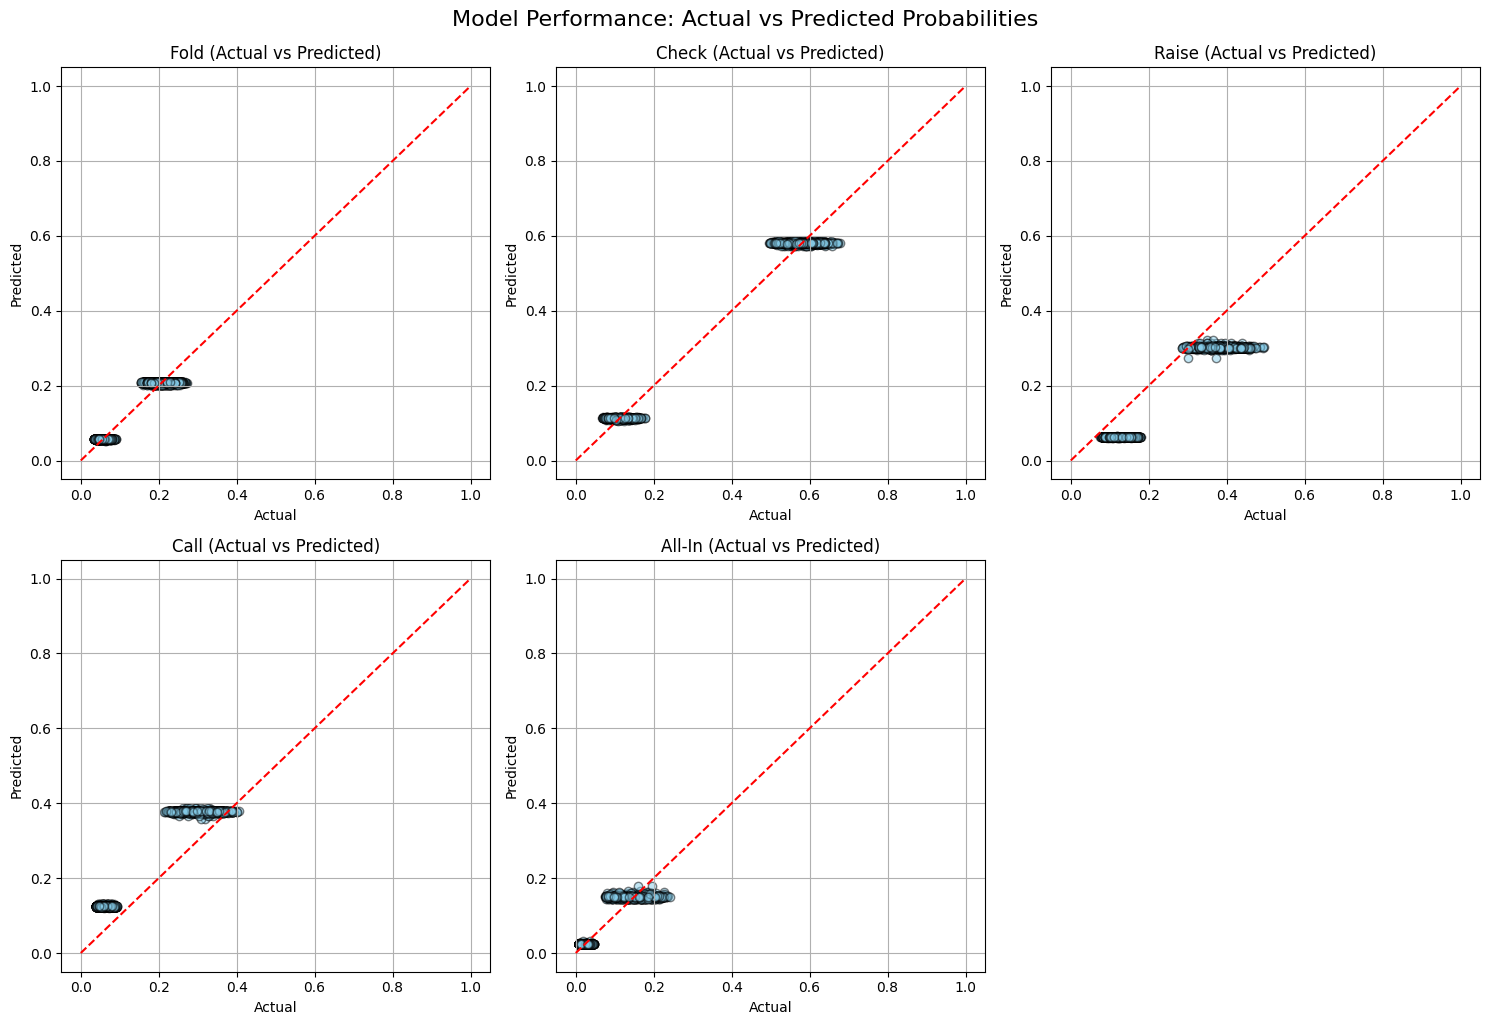

In [15]:
actions = ['Fold', 'Check', 'Raise', 'Call', 'All-In']

plt.figure(figsize=(15, 10))

for i, action in enumerate(actions):
    plt.subplot(2, 3, i + 1)
    plt.scatter(y_test[action], y_pred[:, i], alpha=0.5, color='skyblue', edgecolors='k')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title(f'{action} (Actual vs Predicted)')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)

plt.tight_layout()
plt.suptitle('Model Performance: Actual vs Predicted Probabilities', fontsize=16, y=1.02)
plt.show()


#### Step 9. Calculating Test Score

We now calculate the testing_score of this model.

In [16]:
# Calculate the R² score (test score)
test_score = model_A.score(X_test, y_test)  # model_A is your trained model
print(f'Test data score (R²): {test_score:.4f}')


Test data score (R²): 0.7866


#### Step 10

When your model is ready for operations, move it to the Deploy_Model folder.